In [1]:
%matplotlib inline
import sys, os
sys.path.append('../../')
import h5py
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from decimal import Decimal
#from tools import OHLC, Density
#from tools import open_file, products
from tools.instruments import instruments
from IPython.display import clear_output
import time
import math

In [2]:
%load_ext autoreload
%aimport tools.TDOP
%autoreload 2

Density File Load

In [95]:
Tau = 50 #time constant
densitypath = os.path.join(os.getcwd(), '..','..','data','price density',f'density_Tau_{Tau}.hdf')
densityfile = h5py.File(densitypath, 'r')

File to Write Percentiles

In [159]:
savepath = os.path.join(os.getcwd(), '..','..','data','price density',f'percentiles_Tau_{Tau}.hdf')
savefile = h5py.File(savepath, 'w')

In [160]:
length = len(densityfile.keys())
for i, value in enumerate(densityfile.items()):
    symbol = value[0]
    data = value[1]
    print(f"{symbol} ({i+1}/{length})")
    priceindex = data['priceindex'][:]
    dates = data['dates'][:]
    densities = data['density'][:]
    
    limits = []
    for density in densities:
        if density.sum() == 0:
            limits.append([np.nan for i in range (100)])
            continue
        cum_density = density.cumsum()/density.sum()
        percentiles = []
        for i in range(100):
            index = np.where(cum_density <= i*0.01)[0].max()
            percentiles.append(index)
        limits.append(priceindex[percentiles])
    
    limits = np.array(limits)
    group = savefile.create_group(symbol)
    group.create_dataset("dates", dates.shape, data=dates.astype('int64'))
    #group.create_dataset("priceindex", priceindex.shape, data=priceindex)
    group.create_dataset("percentiles", limits.shape, data=limits, compression="gzip")
    savefile.flush()

AD (1/39)
BO (2/39)
BP (3/39)
C (4/39)
CC (5/39)
CD (6/39)
CL (7/39)
CT (8/39)
DX (9/39)
EC (10/39)
ES (11/39)
FV (12/39)
GC (13/39)
HG (14/39)
HO (15/39)
JY (16/39)
KC (17/39)
LC (18/39)
LN (19/39)
MD (20/39)
NE (21/39)
NG (22/39)
NK (23/39)
NQ (24/39)
O (25/39)
OJ (26/39)
PA (27/39)
PL (28/39)
RB (29/39)
RTY (30/39)
S (31/39)
SB (32/39)
SF (33/39)
SI (34/39)
SM (35/39)
TU (36/39)
TY (37/39)
US (38/39)
W (39/39)


In [161]:
savefile.close()

### Verification

In [162]:
file = h5py.File(savepath, 'r')

In [177]:
ad = file['NQ']['percentiles'][:]

In [178]:
df = pd.DataFrame(data=ad, index=file['NQ']['dates'][:].astype('M8[ns]'))

<AxesSubplot:xlabel='date'>

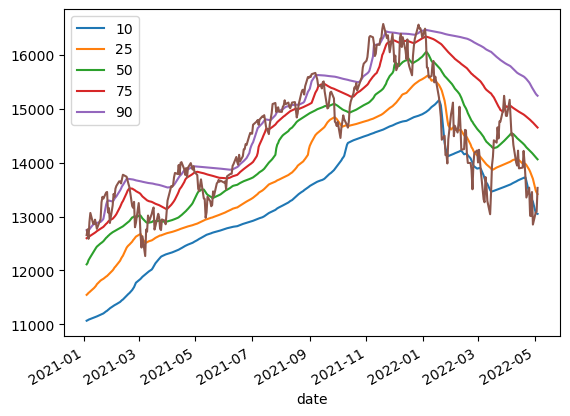

In [180]:
df.loc['2021-01-01':][[10,25,50,75,90]].plot()
instruments['NQ'].quotes().loc['2021-01-01':]['close'].plot()